In [1]:
using DataFrames
using CSV
using Statistics

In [2]:
function isincreasing(coll)
    sort(coll) == coll
end
isdecreasing(coll) = sort(coll, rev=true) == coll
function isunimodal(coll)
    i = argmin(coll)
    return isincreasing(coll) || isdecreasing(coll) || (isdecreasing(coll[1:i]) && isincreasing(coll[i:length(coll)]))
end
@assert isunimodal([1,2,3,4,5])
@assert isunimodal([5,4,3,2,1])
@assert isunimodal([5,4,3,2,1,2,3,4,5])
@assert !isunimodal([1,2,3,4,5,4,3,2,6])

In [3]:
fn = "results/tracerx.tsv"
df = DataFrame(CSV.File(fn, delim='\t'))
grps = groupby(df, [:patient, :n, :tree])
@show mean([isunimodal(g.BIC) for g in grps])
ns = []
for g in grps
    push!(ns, g.n[1])
    if !isunimodal(g.BIC)
        println(g)
    end
end
@show mean(ns)
# [g for g=grps if !isunimodal(g)]

mean([isunimodal(g.BIC) for g = grps]) = 0.993006993006993
15×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS       BIC       
     │ String    Int64  Int64  Int64  Int64    Int64    Float64   Float64   
─────┼──────────────────────────────────────────────────────────────────────
   1 │ CRUK0062     15      1      0     1071     1071  1774.03    351.31
   2 │ CRUK0062     15      1      1      407      664  1049.31   -353.963
   3 │ CRUK0062     15      1      2      239      425   987.795  -390.049
   4 │ CRUK0062     15      1      3      116      445   954.992  -387.775
   5 │ CRUK0062     15      1      4       72      445   919.93   -390.731
   6 │ CRUK0062     15      1      5       72      363   910.485  -354.686
   7 │ CRUK0062     15      1      6       38      325   898.373  -323.063
   8 │ CRUK0062     15      1      7       38      254   893.422  -280.114
   9 │ CRUK0062     15      1      8       31      239   886.483  -240.435
  10 │ CRUK0062   

6.636363636363637

In [11]:
first(grps)

,patient,n,tree,k,min_mut,max_mut,RSS,BIC
,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,CRUK0001,7,1,0,2043,2043,10553.3,1896.22
2,CRUK0001,7,1,1,272,1771,5721.93,1530.43
3,CRUK0001,7,1,2,272,1170,4803.43,1458.42
4,CRUK0001,7,1,3,272,1170,4558.26,1468.79
5,CRUK0001,7,1,4,84,1170,4381.87,1487.84
6,CRUK0001,7,1,5,84,1170,4277.14,1517.16
7,CRUK0001,7,1,6,84,1170,4218.0,1553.37


In [27]:
for g in grps
    println(g)
end

7×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS       BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64   Float64 
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0001      7      1      0     2043     2043  10553.3   1896.22
   2 │ CRUK0001      7      1      1      272     1771   5721.93  1530.43
   3 │ CRUK0001      7      1      2      272     1170   4803.43  1458.42
   4 │ CRUK0001      7      1      3      272     1170   4558.26  1468.79
   5 │ CRUK0001      7      1      4       84     1170   4381.87  1487.84
   6 │ CRUK0001      7      1      5       84     1170   4277.14  1517.16
   7 │ CRUK0001      7      1      6       84     1170   4218.0   1553.37
8×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼───────────────────────────────────────────────────────────────────

   8 │ CRUK0009      8      1      7        8      185  587.225  165.935
4×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0010      4      1      0      130      130  140.442  -344.592
   2 │ CRUK0010      4      1      1       32       98  128.727  -336.384
   3 │ CRUK0010      4      1      2       27       71  119.167  -324.361
   4 │ CRUK0010      4      1      3        5       71  117.015  -289.705
8×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS       BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64   Float64 
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0011      8      1      0      649      649  1264.71   429.592
   2 │ CRUK0011      8      1      1      219      430  1046.8    330.863

   9 │ CRUK0013      9      4      8        5      108  235.073  -698.669
9×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0013      9      5      0      214      214  290.38   -894.76
   2 │ CRUK0013      9      5      1       79      135  246.992  -987.252
   3 │ CRUK0013      9      5      2       27      108  240.536  -962.806
   4 │ CRUK0013      9      5      3       21      108  238.218  -923.843
   5 │ CRUK0013      9      5      4       10      108  236.148  -884.052
   6 │ CRUK0013      9      5      5        5      108  235.68   -838.435
   7 │ CRUK0013      9      5      6        5      108  235.234  -792.739
   8 │ CRUK0013      9      5      7        5      108  235.121  -745.824
   9 │ CRUK0013      9      5      8        5      108  235.073  -698.669
9×8 SubDataFrame
 R

   3 │ CRUK0019      3      1      2       15       54  77.8785  -257.727
4×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS            BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64        Float64 
─────┼─────────────────────────────────────────────────────────────────────────
   1 │ CRUK0020      4      1      0     3258     3258      1.30109e5  2278.64
   2 │ CRUK0020      4      1      1     1023     2235  14495.8        1477.6
   3 │ CRUK0020      4      1      2      201     2034  13627.3        1495.53
   4 │ CRUK0020      4      1      3       18     2016  13627.4        1537.19
4×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0021      4      1      0      204      204  242.133  -135.43
   2 │ CRUK0021      4      1      1   

   3 │ CRUK0026      3      1      2       24      102  146.789   -75.1798
5×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0027      5      1      0      937      937  4500.24  1117.5
   2 │ CRUK0027      5      1      1      180      757  1913.32   750.181
   3 │ CRUK0027      5      1      2       77      680  1490.66   673.579
   4 │ CRUK0027      5      1      3       19      680  1479.67   713.244
   5 │ CRUK0027      5      1      4        5      680  1482.49   757.375
5×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0028      5      1      0       90       90  84.4474  -790.859

   7 │ CRUK0034      7      1      6       13      621  1156.76  683.982
5×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0035      5      1      0      214      214  229.951  -310.024
   2 │ CRUK0035      5      1      1       36      178  227.117  -272.761
   3 │ CRUK0035      5      1      2       10      178  224.457  -235.199
   4 │ CRUK0035      5      1      3       10      155  222.09   -197.072
   5 │ CRUK0035      5      1      4       10      155  220.506  -157.29
7×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0036      7      1      0      207      207  312.606  -468.72
 

  10 │ CRUK0037     10      7      9        6      374  484.603  -175.574
10×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0037     10      8      0      466      466  637.923  -344.298
   2 │ CRUK0037     10      8      1       81      385  500.73   -528.694
   3 │ CRUK0037     10      8      2       11      374  491.446  -498.593
   4 │ CRUK0037     10      8      3       11      374  488.976  -455.36
   5 │ CRUK0037     10      8      4       10      374  486.2    -412.758
   6 │ CRUK0037     10      8      5        6      374  484.495  -368.063
   7 │ CRUK0037     10      8      6        6      374  483.235  -322.493
   8 │ CRUK0037     10      8      7        6      374  482.195  -276.492
   9 │ CRUK0037     10      8      8        6      374  480.936  -230.934
  10 │ CRUK0037   

  10 │ CRUK0037     10     15      9        6      374  484.603  -175.574
10×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0037     10     16      0      466      466  637.923  -344.298
   2 │ CRUK0037     10     16      1       59      407  542.303  -452.127
   3 │ CRUK0037     10     16      2       10      397  518.477  -447.19
   4 │ CRUK0037     10     16      3        6      395  503.921  -426.459
   5 │ CRUK0037     10     16      4        6      380  492.302  -400.785
   6 │ CRUK0037     10     16      5        6      374  485.753  -365.572
   7 │ CRUK0037     10     16      6        6      374  483.235  -322.493
   8 │ CRUK0037     10     16      7        6      374  482.452  -275.981
   9 │ CRUK0037     10     16      8        6      374  480.936  -230.934
  10 │ CRUK0037   

   5 │ CRUK0046      5      2      4        5      178  188.717  -232.015
3×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0047      3      1      0      262      262  364.367  107.379
   2 │ CRUK0047      3      1      1       25      237  327.969  116.71
   3 │ CRUK0047      3      1      2       25      212  314.101  143.907
4×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0048      4      1      0      426      426  597.851  211.651
   2 │ CRUK0048      4      1      1       25      401  536.218  211.526
   3 │ CRUK0048      4      1      2       25      373  528.856  247.871
   4 │ CRUK

   4 │ CRUK0056      4      1      3        9      314  431.458  211.364
4×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0057      4      1      0     1091     1091  2078.4   690.12
   2 │ CRUK0057      4      1      1       63     1028  1931.38  703.602
   3 │ CRUK0057      4      1      2       35      993  1884.87  735.896
   4 │ CRUK0057      4      1      3       14      993  1883.45  777.261
2×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0061      2      1      0      269      269  366.17   160.758
   2 │ CRUK0061      2      1      1        5      264  366.257  197.606
15×8 SubData

   5 │ CRUK0067      5      1      4       24      251  398.858  127.196
5×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0067      5      2      0      425      425  461.078   23.9114
   2 │ CRUK0067      5      2      1      138      287  426.35    29.5407
   3 │ CRUK0067      5      2      2       36      251  403.341   46.1275
   4 │ CRUK0067      5      2      3       24      251  400.381   85.8083
   5 │ CRUK0067      5      2      4       24      251  398.858  127.196
10×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS       BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64   Float64 
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0068     10      1      0      865      865  2209.68   848.39


  10 │ CRUK0071     10      1      9        8      418  716.979   200.474
6×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC      
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64  
─────┼────────────────────────────────────────────────────────────────────
   1 │ CRUK0072      6      1      0      413      413  486.998  -52.1881
   2 │ CRUK0072      6      1      1       35      378  418.409  -95.1314
   3 │ CRUK0072      6      1      2       35      325  407.556  -65.7769
   4 │ CRUK0072      6      1      3       26      325  405.371  -24.3805
   5 │ CRUK0072      6      1      4        8      325  404.818   19.3257
   6 │ CRUK0072      6      1      5        6      325  404.485   63.3442
3×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
 

   7 │ CRUK0077      7      2      6        9      554  617.716  262.401
6×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC        
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64    
─────┼──────────────────────────────────────────────────────────────────────
   1 │ CRUK0078      6      1      0      340      340  424.928  -130.72
   2 │ CRUK0078      6      1      1       51      289  410.384  -106.287
   3 │ CRUK0078      6      1      2       29      260  390.314   -90.6756
   4 │ CRUK0078      6      1      3        7      260  389.629   -47.1948
   5 │ CRUK0078      6      1      4       14      260  388.963    -3.68783
   6 │ CRUK0078      6      1      5        7      260  388.278    39.7895
6×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼────────────────────────────────────────────────────────────

   3 │ CRUK0087      3      1      2        7      517  1188.41  527.136
3×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0088      3      1      0      539      539  1292.24  471.978
   2 │ CRUK0088      3      1      1        9      530  1284.0   509.776
   3 │ CRUK0088      3      1      2        5      525  1282.86  549.161
2×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BIC     
     │ String    Int64  Int64  Int64  Int64    Int64    Float64  Float64 
─────┼───────────────────────────────────────────────────────────────────
   1 │ CRUK0090      2      1      0     1205     1205  3069.68  568.994
   2 │ CRUK0090      2      1      1        3     1202  3066.24  605.582
6×8 SubDataFrame
 Row │ patient   n      tree   k      min_mut  max_mut  RSS      BI

ternary_search (generic function with 1 method)

In [19]:
vcat(collect(7:-1:1),collect(2:9))

15-element Array{Int64,1}:
 7
 6
 5
 4
 3
 2
 1
 2
 3
 4
 5
 6
 7
 8
 9

In [4]:
fib = [1, 1]
for i in 3:20
    push!(fib, fib[i - 1] + fib[i - 2])
end
@show fib
function fibonacci_search(l, r, f_)
    accessed = Set{Int}()
    function f(i)
        push!(accessed, i)
        f_(i)
    end
    F = r - l + 1
    n = searchsortedfirst(fib, F)
    k = 0
    
    while r - l >= 4
        m1 = l + trunc(Int, (r - l) * (1 - (fib[n - 1 - k]/fib[n-k])))
        m2 = l + trunc(Int, (r - l) * (fib[n - 1 - k]/fib[n - k]))
        f1 = f(m1)
        f2 = f(m2)
        if f1 <= f2
            r = m2
        else
            l = m1
        end
        k += 1
    end
#     @show l, r, k, n
    return minimum([f(i) for i in l:r]), sort(collect(accessed))
end
a = vcat(collect(1:100))
@show a
fibonacci_search(1,length(a), i -> a[i])

fib = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


(1, [1, 2, 3, 4, 5, 9, 14, 15, 23, 24, 38, 62])

In [115]:
lattice = [fib[i+1] - 1 for i in 1:(length(fib)-1)]
function lattice_search(l, r, f_)
    accessed = Set{Int}()
    function f(i)
        push!(accessed, i)
        f_(i)
    end
    F = r - l + 1
    n = searchsortedfirst(lattice, F)
    k = 0
    
    while r - l >= 3
        m1 = l + trunc(Int, (r - l) * (1 - (lattice[n - 1 - k]/lattice[n-k])) + 0.5)
        m2 = l + trunc(Int, (r - l) * (lattice[n - 1 - k]/lattice[n - k]) + 0.5)
        f1 = f(m1)
        f2 = f(m2)
        if f1 <= f2
            r = m2
        else
            l = m1
        end
        k += 1
    end
#     @show l, r, k, n
    return minimum([f(i) for i in l:r]), sort(collect(accessed))
end
@show lattice
a = vcat(collect(1:100))
@show a
lattice_search(1,length(a), i -> a[i])

lattice = [0, 1, 2, 4, 7, 12, 20, 33, 54, 88, 143, 232, 376, 609, 986, 1596, 2583, 4180, 6764]
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


(1, [1, 2, 3, 4, 6, 7, 9, 10, 15, 24, 25, 38, 39, 62])

1.0


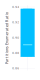

In [46]:
function ternary_search(l, r, f_)
    accessed = Set{Int}()
    function f(i)
        push!(accessed, i)
        f_(i)
    end
    while (r - l) >= 3
        m1 = l + (r - l) ÷ 3
        m2 = r - (r - l) ÷ 3
        f1 = f(m1)
        f2 = f(m2)
        if f1 > f2
            l = m1
        else
            r = m2
        end
    end
    return minimum([f(i) for i in l:r]), sort(collect(accessed))
end


ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = ternary_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(correct, extreme == minimum(arr))
    push!(ratios, numpartitions / total)
#     println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
println(mean(correct))
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)


1.0


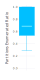

In [88]:
function ternary_search(l, r, f_)
    accessed = Set{Int}()
    function f(i)
        push!(accessed, i)
        f_(i)
    end
    while (r - l) >= 3
        m1 = l + (r - l) ÷ 3
        m2 = r - (r - l) ÷ 3
        f1 = f(m1)
        f2 = f(m2)
        if f1 > f2
            l = m1
        else
            r = m2
        end
    end
    return minimum([f(i) for i in l:r]), sort(collect(accessed))
end


ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = fibonacci_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(correct, extreme == minimum(arr))
    push!(ratios, numpartitions / total)
#     println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
println(mean(correct))
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)


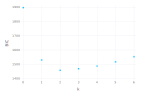

In [12]:
using Gadfly
plot(first(grps), x=:k, y=:BIC)

In [10]:
fn = "results/sims - Copy.tsv"
df = DataFrame(CSV.File(fn, delim='\t'))
grps = groupby(df, [:instance, :n])
@show mean([isunimodal(g.BIC) for g in grps])
ns = []
for g in grps
    push!(ns, g.n[1])
    if !isunimodal(g.BIC)
        println(g)
    end
end
@show mean(ns)

mean([isunimodal(g.BIC) for g = grps]) = 0.9833333333333333
5×7 SubDataFrame
 Row │ instance                    n      k      min_mut  max_mut  RSS       BIC      
     │ String                      Int64  Int64  Float64  Float64  Float64   Float64  
─────┼────────────────────────────────────────────────────────────────────────────────
   1 │ m5_S18_k2_eps0.2.P_eps.txt      5      0     Inf     -Inf   118.025   -488.173
   2 │ m5_S18_k2_eps0.2.P_eps.txt      5      1     Inf     -Inf    83.8082  -467.296
   3 │ m5_S18_k2_eps0.2.P_eps.txt      5      2     Inf     -Inf    53.8758  -494.169
   4 │ m5_S18_k2_eps0.2.P_eps.txt      5      3     Inf     -Inf    51.4448  -331.118
   5 │ m5_S18_k2_eps0.2.P_eps.txt      5      4     Inf     -Inf    49.1077  -168.222
5×7 SubDataFrame
 Row │ instance                    n      k      min_mut  max_mut  RSS       BIC       
     │ String                      Int64  Int64  Float64  Float64  Float64   Float64   
─────┼─────────────────────────────────

6.0

-961.0771-961.07710.8 rat: 0.9375
-871.8192-871.81920.8 rat: 0.9375
-681.5255-681.52550.8 rat: 0.9375
-807.2424-807.24240.8 rat: 0.9375
-607.737-607.7370.8 rat: 0.9375
-511.8281-511.82810.8 rat: 0.9375
-593.6407-593.64070.6 rat: 0.875
-494.1692-494.16920.6 rat: 0.875
-321.1432-321.14320.6 rat: 0.875
-930.2641-930.26410.8 rat: 0.9375
-858.5361-858.53610.8 rat: 0.9375
-651.1533-651.15330.8 rat: 0.9375
-712.0973-712.09730.8 rat: 0.9375
-620.4907-620.49070.8 rat: 0.9375
-552.3786-552.37860.8 rat: 0.9375
-624.7308-624.73080.6 rat: 0.875
-595.3789-595.37890.8 rat: 0.9375
-255.8664-255.86640.6 rat: 0.875
-977.4812-977.48120.8 rat: 0.9375
-822.5559-822.55590.8 rat: 0.9375
-662.032-662.0320.8 rat: 0.9375
-938.2491-938.24910.8 rat: 0.9375
-721.5159-721.51590.8 rat: 0.9375
-519.1097-519.10970.8 rat: 0.9375
-657.8305-657.83050.6 rat: 0.875
-465.8676-465.86760.6 rat: 0.875
-413.4484-413.44840.6 rat: 0.875
-955.6956-955.69560.8 rat: 0.9375
-766.8323-766.83230.8 rat: 0.9375
-725.3787-725.37870.8 rat:

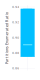

In [83]:
ratios = []

for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = ternary_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)

-961.0771-961.07710.6 rat: 0.6875
-871.8192-871.81920.6 rat: 0.6875
-681.5255-681.52550.6 rat: 0.6875
-807.2424-807.24240.6 rat: 0.6875
-607.737-607.7370.6 rat: 0.6875
-511.8281-511.82810.6 rat: 0.6875
-593.6407-593.64070.6 rat: 0.6875
-494.1692-494.16920.6 rat: 0.6875
-321.1432-321.14320.6 rat: 0.6875
-930.2641-930.26410.6 rat: 0.6875
-858.5361-858.53610.6 rat: 0.6875
-651.1533-651.15330.6 rat: 0.6875
-712.0973-712.09730.6 rat: 0.6875
-620.4907-620.49070.6 rat: 0.6875
-552.3786-552.37860.6 rat: 0.6875
-624.7308-624.73080.6 rat: 0.6875
-595.3789-595.37890.6 rat: 0.6875
-255.8664-255.86640.6 rat: 0.6875
-977.4812-977.48120.6 rat: 0.6875
-822.5559-822.55590.6 rat: 0.6875
-662.032-662.0320.6 rat: 0.6875
-938.2491-938.24910.6 rat: 0.6875
-721.5159-721.51590.6 rat: 0.6875
-519.1097-519.10970.6 rat: 0.6875
-657.8305-657.83050.6 rat: 0.6875
-465.8676-465.86760.6 rat: 0.6875
-413.4484-413.44840.6 rat: 0.6875
-955.6956-955.69560.6 rat: 0.6875
-766.8323-766.83230.6 rat: 0.6875
-725.3787-725.3787

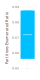

In [116]:
ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = lattice_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    push!(correct, extreme == minimum(arr))
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
@show mean(correct)
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)

1458.4231458.4230.5714285714285714 rat: 0.65625
-362.7783-362.77830.5 rat: 0.5
-637.6278-637.62780.5 rat: 0.5
-466.3889-466.38890.5714285714285714 rat: 0.65625
-466.3889-466.38890.5714285714285714 rat: 0.65625
912.2298912.22980.6666666666666666 rat: 0.8125
912.2298912.22980.6666666666666666 rat: 0.8125
849.2439849.24391.0 rat: 1.0
-299.0022-299.00221.0 rat: 1.0
-23.83463-23.834630.8 rat: 0.9375
-24.37013-24.370130.5 rat: 0.765625
-344.5919-344.59191.0 rat: 1.0
290.9156290.91560.5 rat: 0.765625
341.9364341.93640.5 rat: 0.765625
290.9156290.91560.5 rat: 0.765625
-565.007-565.0070.6 rat: 0.6875
-565.007-565.0070.6 rat: 0.6875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-989.8253-989.82530.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-989.8253-989.82530.5555555555555556 rat: 0.6367187

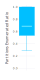

In [103]:
ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = fibonacci_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    push!(correct, extreme == minimum(arr))
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
@show mean(correct)
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)

-961.0771-961.07710.6 rat: 0.6875
-871.8192-871.81920.6 rat: 0.6875
-681.5255-681.52550.6 rat: 0.6875
-807.2424-807.24240.6 rat: 0.6875
-607.737-607.7370.6 rat: 0.6875
-511.8281-511.82810.6 rat: 0.6875
-593.6407-593.64070.8 rat: 0.9375
-494.1692-494.16920.8 rat: 0.9375
-321.1432-321.14320.8 rat: 0.9375
-930.2641-930.26410.6 rat: 0.6875
-858.5361-858.53610.6 rat: 0.6875
-651.1533-651.15330.6 rat: 0.6875
-712.0973-712.09730.6 rat: 0.6875
-620.4907-620.49070.6 rat: 0.6875
-552.3786-552.37860.6 rat: 0.6875
-624.7308-624.73080.8 rat: 0.9375
-595.3789-595.37890.6 rat: 0.6875
-255.8664-255.86640.8 rat: 0.9375
-977.4812-977.48120.6 rat: 0.6875
-822.5559-822.55590.6 rat: 0.6875
-662.032-662.0320.6 rat: 0.6875
-938.2491-938.24910.6 rat: 0.6875
-721.5159-721.51590.6 rat: 0.6875
-519.1097-519.10970.6 rat: 0.6875
-657.8305-657.83050.8 rat: 0.9375
-465.8676-465.86760.8 rat: 0.9375
-413.4484-413.44840.8 rat: 0.9375
-955.6956-955.69560.6 rat: 0.6875
-766.8323-766.83230.6 rat: 0.6875
-725.3787-725.3787

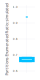

In [114]:
ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = lattice_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    push!(correct, extreme == minimum(arr))
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
@show mean(correct)
set_default_plot_size(4cm, 8cm)
plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio"),Geom.boxplot)

In [8]:
using Gadfly
ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = fibonacci_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    push!(correct, extreme == minimum(arr))
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
@show mean(correct)
@show mean(ratios)
@show std(ratios)
# set_default_plot_size(4cm, 8cm)
# plot(y=ratios,Guide.ylabel("Partitions Enumerated Ratio; tracerx"),Geom.boxplot)

1458.4231458.4230.5714285714285714 rat: 0.65625
-362.7783-362.77830.5 rat: 0.5
-637.6278-637.62780.5 rat: 0.5
-466.3889-466.38890.5714285714285714 rat: 0.65625
-466.3889-466.38890.5714285714285714 rat: 0.65625
912.2298912.22980.6666666666666666 rat: 0.8125
912.2298912.22980.6666666666666666 rat: 0.8125
849.2439849.24391.0 rat: 1.0
-299.0022-299.00221.0 rat: 1.0
-23.83463-23.834630.8 rat: 0.9375
-24.37013-24.370130.5 rat: 0.765625
-344.5919-344.59191.0 rat: 1.0
290.9156290.91560.5 rat: 0.765625
341.9364341.93640.5 rat: 0.765625
290.9156290.91560.5 rat: 0.765625
-565.007-565.0070.6 rat: 0.6875
-565.007-565.0070.6 rat: 0.6875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-989.8253-989.82530.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-987.2523-987.25230.5555555555555556 rat: 0.63671875
-989.8253-989.82530.5555555555555556 rat: 0.6367187

0.19441845696263227

In [11]:
using Gadfly
ratios = []
correct = []
for g in grps
    arr = g.BIC
    n = g.n[1]
    extreme, hits = fibonacci_search(1,length(arr),x -> arr[x])
    numpartitions = sum(binomial(n - 1,i - 1) for i in hits)
    total = sum(binomial(n - 1,i - 1) for i in 1:n)
    push!(ratios, numpartitions / total)
    push!(correct, extreme == minimum(arr))
    println(extreme, minimum(arr), length(hits) / length(arr), " rat: $(numpartitions/total)")
end
@show mean(correct)
@show mean(ratios)
@show std(ratios)

-961.0771-961.07710.6 rat: 0.6875
-871.8192-871.81920.6 rat: 0.6875
-681.5255-681.52550.6 rat: 0.6875
-807.2424-807.24240.6 rat: 0.6875
-607.737-607.7370.6 rat: 0.6875
-511.8281-511.82810.6 rat: 0.6875
-593.6407-593.64070.8 rat: 0.9375
-494.1692-494.16920.8 rat: 0.9375
-321.1432-321.14320.8 rat: 0.9375
-930.2641-930.26410.6 rat: 0.6875
-858.5361-858.53610.6 rat: 0.6875
-651.1533-651.15330.6 rat: 0.6875
-712.0973-712.09730.6 rat: 0.6875
-620.4907-620.49070.6 rat: 0.6875
-552.3786-552.37860.6 rat: 0.6875
-624.7308-624.73080.8 rat: 0.9375
-595.3789-595.37890.6 rat: 0.6875
-255.8664-255.86640.8 rat: 0.9375
-977.4812-977.48120.6 rat: 0.6875
-822.5559-822.55590.6 rat: 0.6875
-662.032-662.0320.6 rat: 0.6875
-938.2491-938.24910.6 rat: 0.6875
-721.5159-721.51590.6 rat: 0.6875
-519.1097-519.10970.6 rat: 0.6875
-657.8305-657.83050.8 rat: 0.9375
-465.8676-465.86760.8 rat: 0.9375
-413.4484-413.44840.8 rat: 0.9375
-955.6956-955.69560.6 rat: 0.6875
-766.8323-766.83230.6 rat: 0.6875
-725.3787-725.3787

0.09249627238450144